# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
#Loading the Data file
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

#Check if the Data file loaded properly
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
df.drop('ID', axis=1, inplace=True)
    
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
#Datatypes of each column
df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
#Shape of Dataset
df.shape

(699, 10)

In [6]:
#Descriptive Analysis
df.describe(include='all')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


# For all other columns except 'Bare Nuclei', they are numeric columns. Let's check shape of each.
**ClumpThickness**: It is slightly right skewed since mean is bit more than median. There are no outliers.

**Cell Size**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Cell Shape**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Marginal Adhesion**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Single Epithelial Cell Size**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Normal Nucleoli**: It is right skewed with some outliers on right tail since mean is greater than median & max value is more than 3rd quartile + 1.5 IQR.

**Bland Chromatin**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Mitoses**: It is highly right skewed with many outliers on right tail since mean is much greater than median & max value is much more than 3rd quartile + 1.5 IQR.

**Class**: This is target variable. Reading description from UCI. It has 2 classes represented by 2 for benign and 4 for malignant. There are more cases of benign than malignant.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
df['Bare Nuclei'].replace('?', np.NaN, inplace=True)

# Check for missing value in any other column
df.count()

ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    683
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df['Bare Nuclei'].isnull().sum()

16

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

#From descriptive analysis, we can see that 1 is repeating 402 times out of 699 records. So, we can replace it by 1 in this case which is both mean & median for this case
df['Bare Nuclei'].fillna('1', inplace=True)

df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [10]:
# Check for correlation of variable
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [11]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


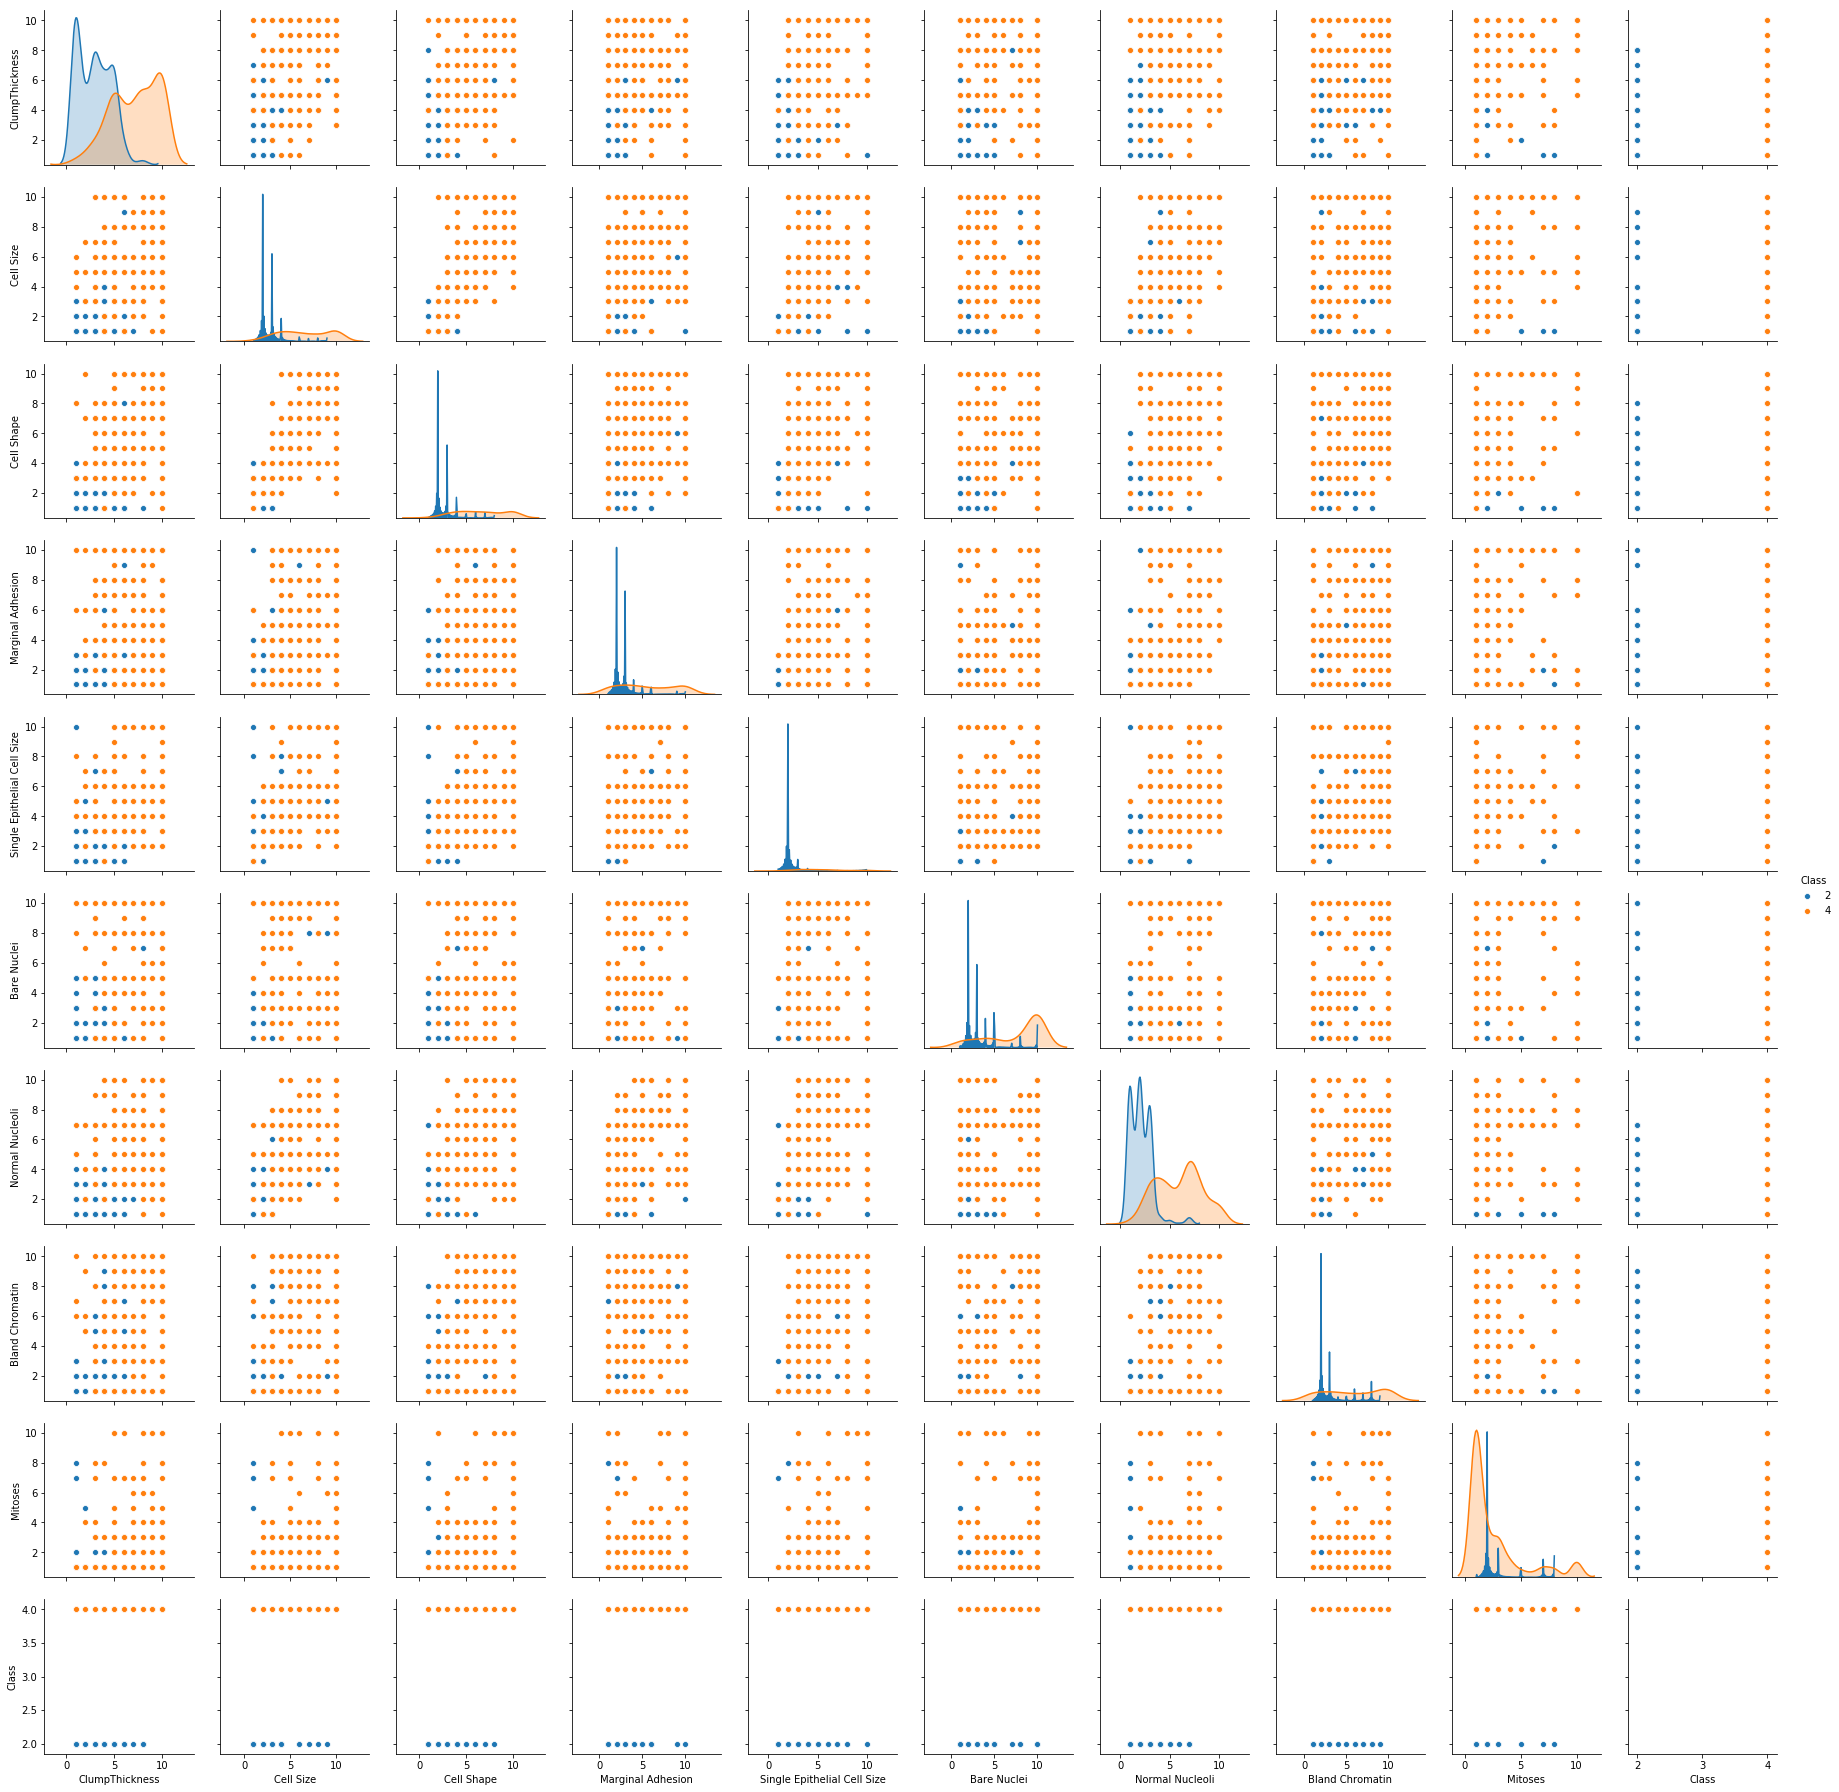

In [12]:
#Let us check for pair plots
sns.pairplot(df, hue='Class')
plt.show()

In [13]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Inferences:
From correlation we can see that Cell size shows high significance with cell shape, marginal adhesion, single epithelial cell size, bare nuclei, normal nucleoli and bland chromatin.

Also, Target variable shows high correlation with most of these variables.

Since maximum columns have discrete values, scatter plots are not helping much other than some correlation seen between Cell sie & cell shape.

Diagonal kde plots show that most columns are good estimators of Class but there might be some outliers which are not easily identifiable due to less representation of malignant case.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

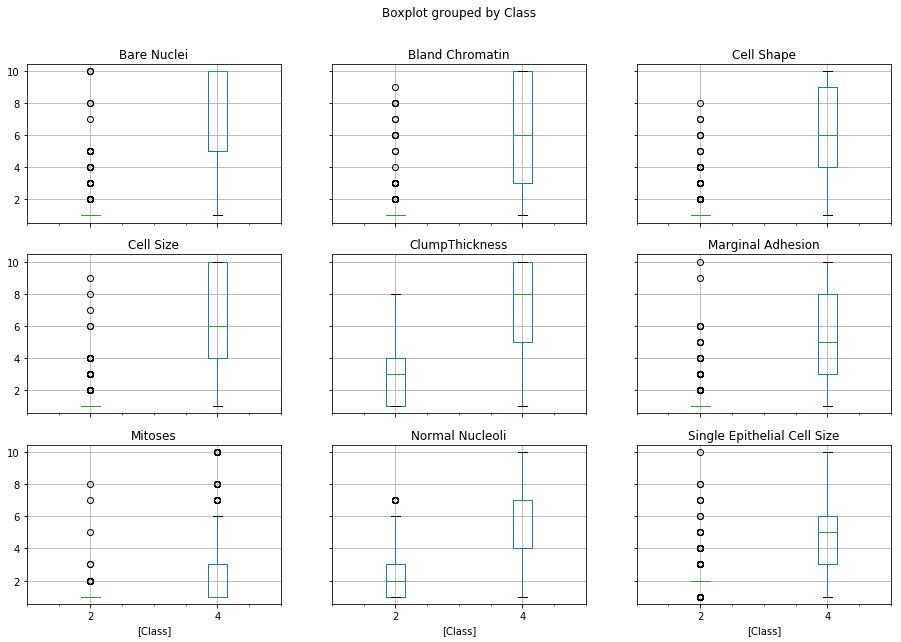

In [14]:
#Let's see Boxplots to idetify outliers
df.boxplot(by='Class', layout=(3,3), figsize=(15, 10))

plt.show()

In [15]:
# Addressing outliers at group level
df_benign = df[df['Class'] == 2]
df_malign = df[df['Class'] == 4]

for col in df_benign.columns:
    df_benign = df_benign[np.abs(df_benign[col]-df_benign[col].mean()) <= (2*df_benign[col].std())]
    df_malign = df_malign[np.abs(df_malign[col]-df_malign[col].mean()) <= (2*df_malign[col].std())]
    
df_new = df_benign.append(df_malign)

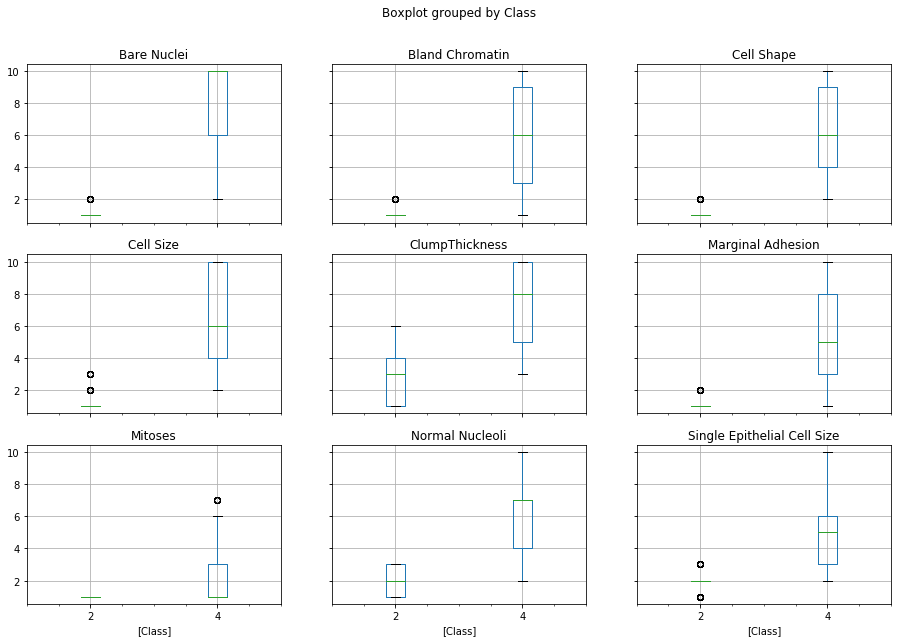

In [16]:
#Let's see Boxplots again
df_new.boxplot(by='Class', layout=(3,3), figsize=(15, 10))

plt.show()

In [17]:
# We could see most of the outliers are now removed.

#Importing zscore from scipy.stats for standardizing variables
from scipy.stats import zscore

#Standardizing variables
df_z = df_new.apply(zscore)

#None of the columns have Correlation with Class very low. So, we keep them all.

# Q6 Create a covariance matrix for identifying Principal components

In [18]:
# PCA
# Step 1 - Create covariance matrix
X = df_z.drop('Class', axis = 1)
y = df_z['Class']
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00193798 0.68007712 0.693631   0.5381424  0.56821109 0.6900189
  0.61635208 0.56156555 0.35475137]
 [0.68007712 1.00193798 0.92125321 0.74347776 0.75843134 0.77456647
  0.78749827 0.72289061 0.45501487]
 [0.693631   0.92125321 1.00193798 0.72540601 0.74314353 0.79935024
  0.78793466 0.72751757 0.4399113 ]
 [0.5381424  0.74347776 0.72540601 1.00193798 0.59835612 0.74455409
  0.72211277 0.63329299 0.47205258]
 [0.56821109 0.75843134 0.74314353 0.59835612 1.00193798 0.68337001
  0.67058655 0.60793856 0.46314378]
 [0.6900189  0.77456647 0.79935024 0.74455409 0.68337001 1.00193798
  0.76684761 0.63661317 0.4305169 ]
 [0.61635208 0.78749827 0.78793466 0.72211277 0.67058655 0.76684761
  1.00193798 0.67649939 0.3825018 ]
 [0.56156555 0.72289061 0.72751757 0.63329299 0.60793856 0.63661317
  0.67649939 1.00193798 0.44239274]
 [0.35475137 0.45501487 0.4399113  0.47205258 0.46314378 0.4305169
  0.3825018  0.44239274 1.00193798]]


# Q7 Identify eigen values and eigen vector

In [19]:
# Step 2- Get eigen values and eigen vector

In [20]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-3.08257524e-01  2.14208121e-01 -7.61643654e-03  8.16086701e-01
  -2.23306294e-01  1.94930979e-01 -3.00595722e-01 -1.17407541e-01
  -3.21023266e-02]
 [-3.73105809e-01  9.96696529e-02  6.99259915e-01 -5.25008727e-02
   1.57750748e-01 -4.57373968e-02  1.47232319e-02  4.39384931e-01
  -3.72671632e-01]
 [-3.73123126e-01  1.32212992e-01 -6.98415184e-01 -1.38340391e-02
   1.32117032e-01 -1.31728304e-02  2.11675461e-01  4.40775080e-01
  -3.14016088e-01]
 [-3.34700710e-01 -5.69506922e-02 -7.63817417e-02 -4.25631329e-01
  -5.33421441e-01 -1.45408338e-01 -3.81018884e-01 -3.28002445e-01
  -3.73219564e-01]
 [-3.29780030e-01 -4.90513301e-02 -4.79355503e-02  5.11693783e-02
   6.71214862e-01 -4.58606543e-01 -1.89496900e-01 -4.30217154e-01
   4.55823375e-02]
 [-3.55098203e-01  1.22027029e-01  1.19839256e-01  5.51977808e-02
  -2.99151751e-01 -2.29920260e-01  7.60153033e-01 -2.83496497e-01
   2.02604132e-01]
 [-3.49764121e-01  1.79354324e-01 -1.35252320e-02 -2.29897254e-01
  -1.08852440e

# Q8 Find variance and cumulative variance by each eigen vector

In [21]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.80908974  77.11338476  82.44203033  87.06742059  91.4873418
  94.22585814  96.88070288  99.14628452 100.        ]


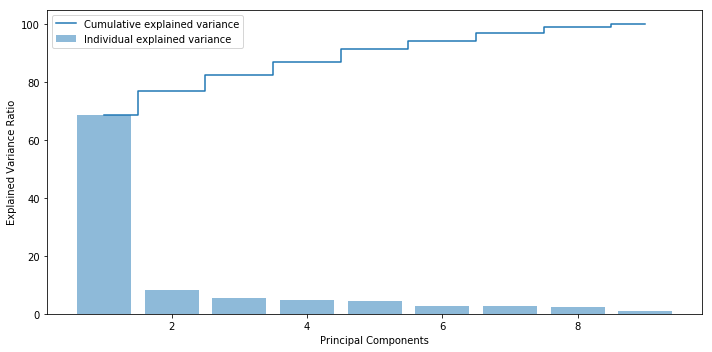

In [22]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [23]:
from sklearn.decomposition import PCA

#Using PCA command to find Principal Components
pca = PCA(n_components=6).fit_transform(X)

In [24]:
#Transforming data
X_reduced = pd.DataFrame(pca)
X_reduced.index = X.index

# Q10 Find correlation between components and features

In [25]:
#Appending original Data & PCA transformed data
X_all = pd.concat([X_reduced, X], axis=1)

In [26]:
#Correlation between Components & original features
X_all.corr().iloc[:6,6:]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.767110,0.928488,0.928531,0.832915,0.820670,0.883675,0.870401,0.808377,0.566481
1,-0.185186,-0.086166,-0.114300,0.049235,0.042406,-0.105494,-0.155055,0.028467,0.807713
2,0.565153,-0.036358,-0.009580,-0.294756,0.035436,0.038225,-0.159207,-0.170894,0.120899
3,0.144078,-0.101781,-0.085242,0.344164,-0.433069,0.193013,0.070232,-0.162931,0.056304
4,-0.122945,0.028847,0.008308,0.091710,0.289247,0.145013,0.040753,-0.516732,0.000264
5,0.015937,0.185014,0.155895,0.185286,-0.022630,-0.100584,-0.373573,-0.028453,-0.048502


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [27]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [28]:
ratings = jokes_df.iloc[:200,1:]

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [29]:
ratings.replace(99, 0, inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [30]:
ratings_diff = pd.DataFrame(ratings.mean())

In [31]:
ratings_diff.sort_values(by=0, ascending=False).iloc[:5]

,0
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
